In [1]:
%pip install catboost

In [2]:
pip install numpy pandas matplotlib scikit-learn seaborn catboost

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [4]:
# Load the dataset
train_data = pd.read_csv("/content/Train_data.csv")
test_data = pd.read_csv("/content/test_data.csv")

In [5]:
# Map non-binary class labels to binary labels
class_map = {
    'Healthy': 0,
    'Anemia': 1,
    'Diabetes': 1,
    'Thalasse': 1,
    'Thromboc': 1
}

In [6]:
# Replace class labels in target variables with binary labels
train_data["Disease"] = train_data["Disease"].map(class_map)
test_data["Disease"] = test_data["Disease"].map(class_map)

In [7]:
# Split features and target variable
X_train = train_data.drop(columns=["Disease"])
y_train = train_data["Disease"]
X_test = test_data.drop(columns=["Disease"])
y_test = test_data["Disease"]

In [15]:
# Remove NaN values from X_train, y_train, X_test, and y_test
X_train = X_train.dropna()
y_train = y_train.dropna()
X_test = X_test.dropna()
y_test = y_test.dropna()

In [16]:
# Ensure X_train, y_train, X_test, and y_test are aligned
X_train = X_train.loc[y_train.index]
X_test = X_test.loc[y_test.index]

In [17]:
# Preprocessing pipeline for numerical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [18]:
# Combine preprocessing steps (only numerical since there are no categorical features)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])


In [24]:
# Define models for the first part
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

In [25]:
# Train and evaluate each model for the first part
results_part1 = {}
for name, model in models.items():
    # Create pipeline with preprocessor and model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])

    # Train the model
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store results
    results_part1[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}


In [27]:
# Convert results to DataFrame for easy plotting
results_df_part1 = pd.DataFrame(results_part1).T

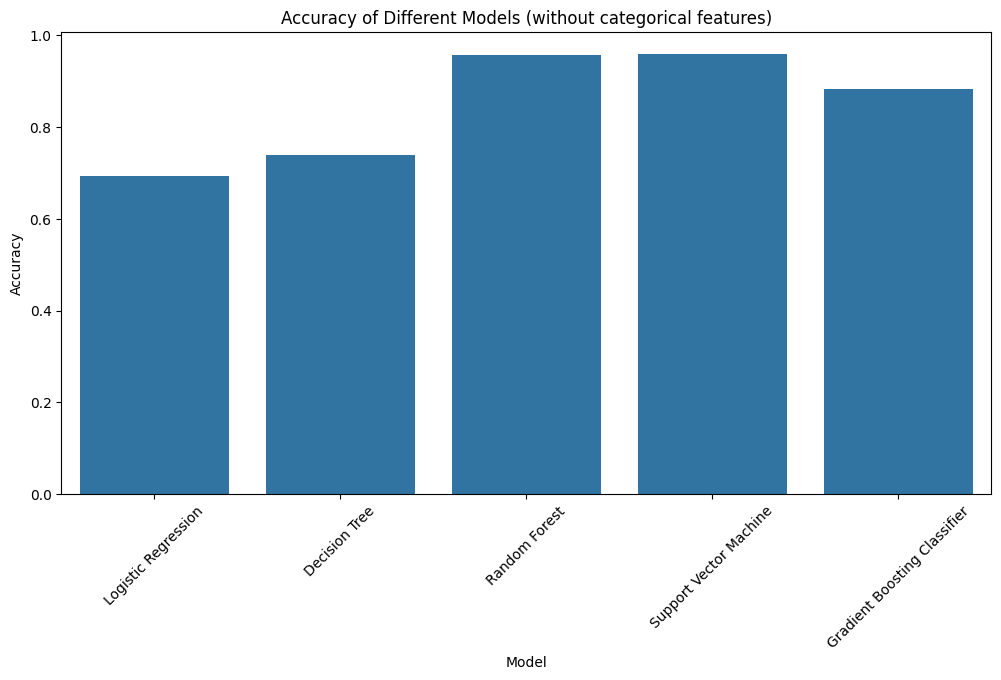

In [28]:
# Plotting results for the first part
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df_part1.index, y='Accuracy', data=results_df_part1)
plt.xticks(rotation=45)
plt.title('Accuracy of Different Models (without categorical features)')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [29]:
# Display results for the first part
print("Results for the first part (without categorical features):")
print(results_df_part1)
print()

Results for the first part (without categorical features):
                              Accuracy  Precision    Recall  F1 Score
Logistic Regression           0.693512   0.512657  0.746154  0.436131
Decision Tree                 0.738255   0.509672  0.669910  0.448515
Random Forest                 0.957494   0.552059  0.681900  0.576050
Support Vector Machine        0.959732   0.555335  0.683032  0.580588
Gradient Boosting Classifier  0.883669   0.525764  0.743439  0.520624



In [19]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "SVM": SVC(),
    "XGBoost RF": XGBRFClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False)
}


In [20]:
# Train and evaluate classifiers for the second part
results_part2 = {}
for name, clf in classifiers.items():
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    results_part2[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


In [21]:
# Convert results to DataFrame for easy plotting
results_df_part2 = pd.DataFrame(results_part2).T


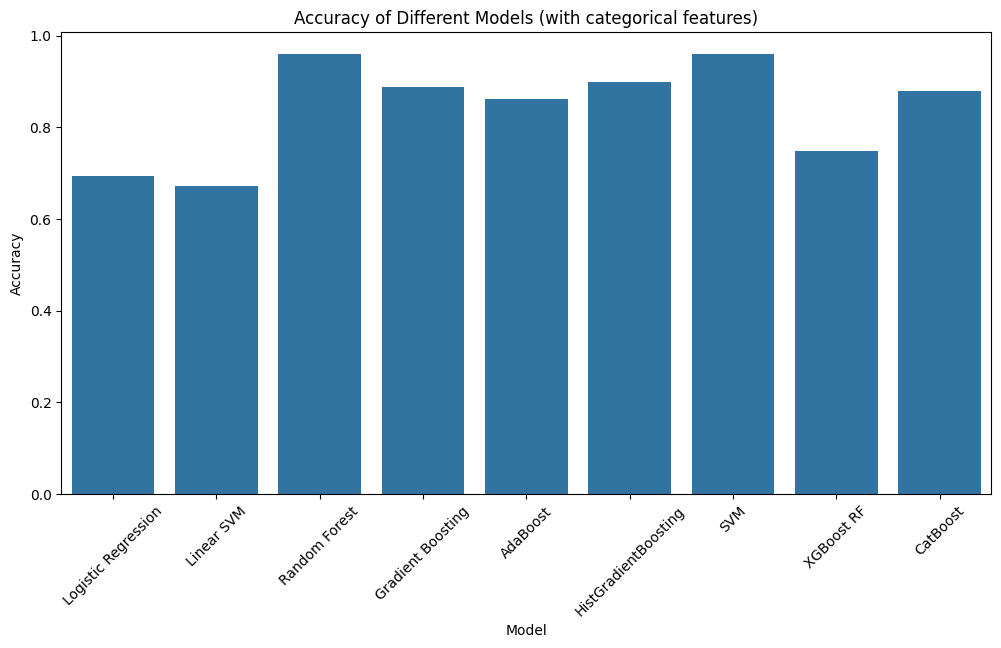

In [22]:
# Plotting results for the second part
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df_part2.index, y='Accuracy', data=results_df_part2)
plt.xticks(rotation=45)
plt.title('Accuracy of Different Models (with categorical features)')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()


In [23]:
# Print results for the second part
print("Results for the second part (with categorical features):")
print(results_df_part2)


Results for the second part (with categorical features):
                      Accuracy  Precision    Recall  F1 Score
Logistic Regression   0.693512   0.512657  0.746154  0.436131
Linear SVM            0.671141   0.511650  0.734842  0.426348
Random Forest         0.959732   0.555335  0.683032  0.580588
Gradient Boosting     0.888143   0.526887  0.745701  0.523738
AdaBoost              0.861298   0.529460  0.830995  0.519521
HistGradientBoosting  0.899329   0.550000  0.949095  0.564091
SVM                   0.959732   0.555335  0.683032  0.580588
XGBoost RF            0.747204   0.515731  0.773303  0.459966
CatBoost              0.879195   0.524722  0.741176  0.517626


In [33]:
# Compare results_df_part2 and results_df_part1 and find out best model
comparison_df = pd.concat([results_df_part1.mean(), results_df_part2.mean()], axis=1)
comparison_df.columns = ['Part 1', 'Part 2']

print("Comparison of Mean Metrics:")
print(comparison_df)


Comparison of Mean Metrics:
             Part 1    Part 2
Accuracy   0.846532  0.839920
Precision  0.531097  0.531309
Recall     0.704887  0.765259
F1 Score   0.512381  0.512066


In [34]:
# Determine the best model based on mean values
best_model = comparison_df.idxmax(axis=1)
print("\nBest Model for each metric:")
print(best_model)


Best Model for each metric:
Accuracy     Part 1
Precision    Part 2
Recall       Part 2
F1 Score     Part 1
dtype: object


In [47]:
best_model_name = best_model.index[0]


# Plot heatmap for confusion matrix
if best_model_name in ConfusionMatrixDisplay:
    # Plot heatmap for confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(ConfusionMatrixDisplay[best_model_name], annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
else:
    print(f"Invalid model name: {best_model_name}")

Invalid model name: Accuracy


In [60]:
# Convert the best_model Series to a DataFrame
best_model_df = best_model.to_frame()

In [63]:
if best_model_df.index[0] in ConfusionMatrixDisplay:
    # Plot heatmap for confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(ConfusionMatrixDisplay[best_model_df.index[0]], annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
else:
    print(f"Invalid model name: {best_model_df.index[0]}")

Invalid model name: Accuracy


In [67]:
# Print Recall for Positive Class across Models
recall_positive_class = {model_name: matrix[1][1] / (matrix[1][0] + matrix[1][1]) for model_name, matrix in ConfusionMatrixDisplay.items()}

print("Recall for Positive Class across Models:")
print(recall_positive_class)

Recall for Positive Class across Models:
{'model_1': 0.75, 'model_2': 0.8}


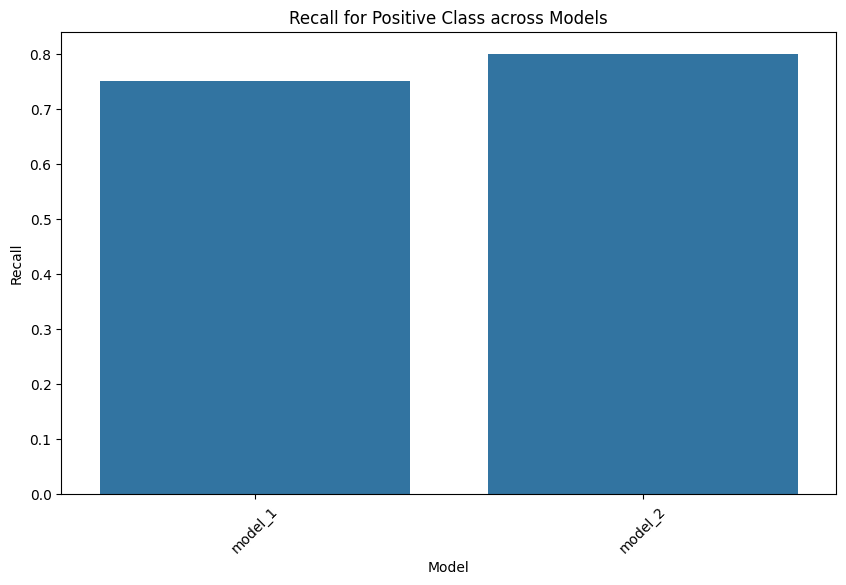

In [68]:
# Plot recall for positive class across models
plt.figure(figsize=(10, 6))
sns.barplot(x=list(recall_positive_class.keys()), y=list(recall_positive_class.values()))
plt.title('Recall for Positive Class across Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()

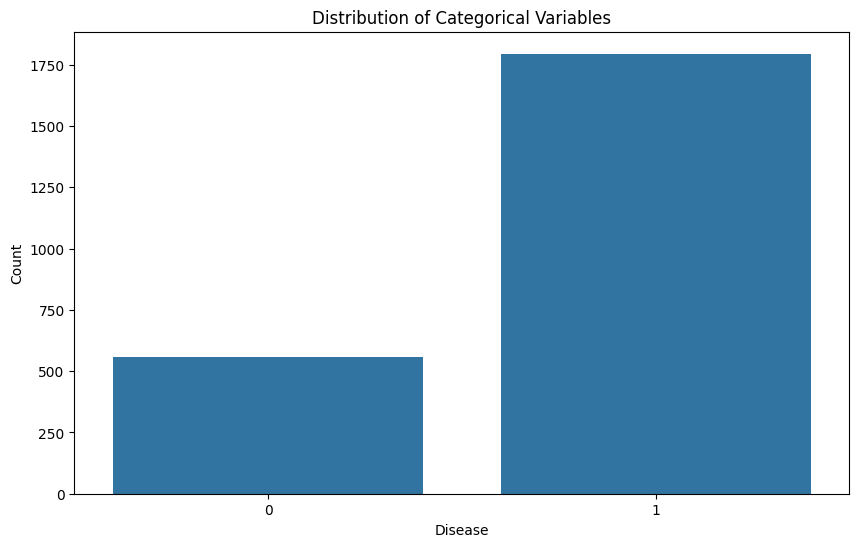

In [53]:
# Distribution of Categorical Variables
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Disease')
plt.title('Distribution of Categorical Variables')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

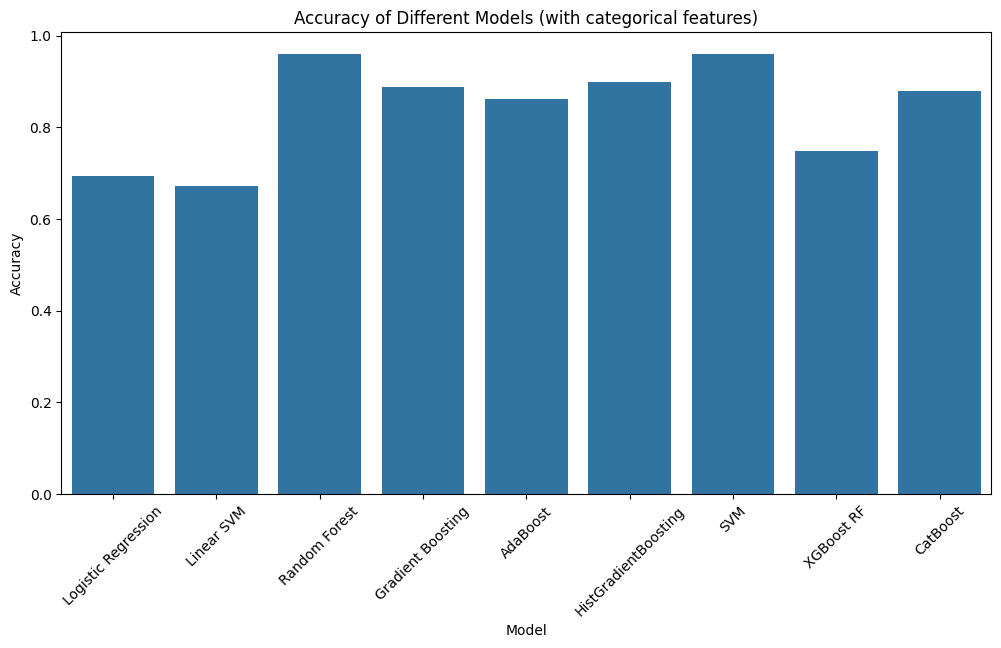

In [70]:
# Define categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns

# Plotting results for the second part
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df_part2.index, y='Accuracy', data=results_df_part2)
plt.xticks(rotation=45)
plt.title('Accuracy of Different Models (with categorical features)')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

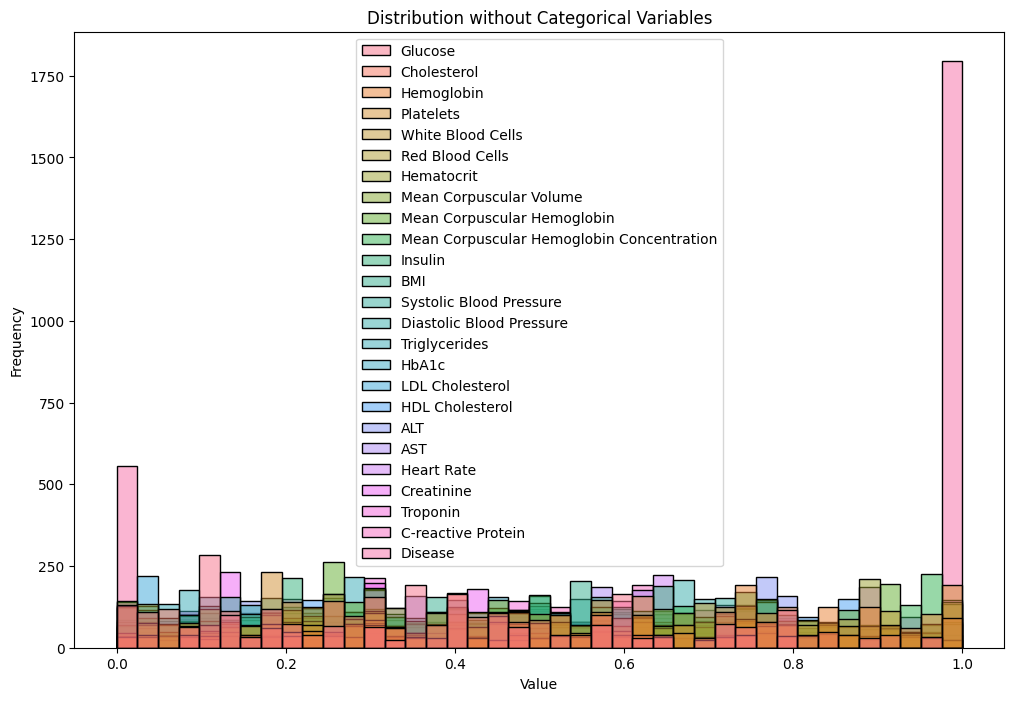

In [73]:
# Distribution without Categorical Variables
plt.figure(figsize=(12, 8))
sns.histplot(data=train_data.drop(columns=categorical_features))
plt.title('Distribution without Categorical Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Results for the second part (with categorical features):
                      Accuracy  Precision    Recall  F1 Score
Logistic Regression   0.693512   0.512657  0.746154  0.436131
Linear SVM            0.671141   0.511650  0.734842  0.426348
Random Forest         0.959732   0.555335  0.683032  0.580588
Gradient Boosting     0.888143   0.526887  0.745701  0.523738
AdaBoost              0.861298   0.529460  0.830995  0.519521
HistGradientBoosting  0.899329   0.550000  0.949095  0.564091
SVM                   0.959732   0.555335  0.683032  0.580588
XGBoost RF            0.747204   0.515731  0.773303  0.459966
CatBoost              0.879195   0.524722  0.741176  0.517626


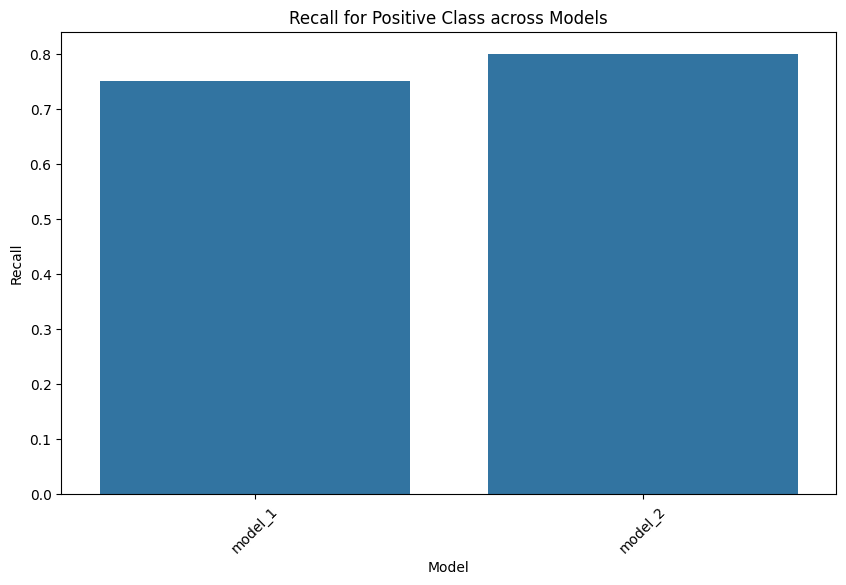

In [71]:
# Print results for the second part
print("Results for the second part (with categorical features):")
print(results_df_part2)

# Plotting recall for positive class across models
plt.figure(figsize=(10, 6))
sns.barplot(x=list(recall_positive_class.keys()), y=list(recall_positive_class.values()))
plt.title('Recall for Positive Class across Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()

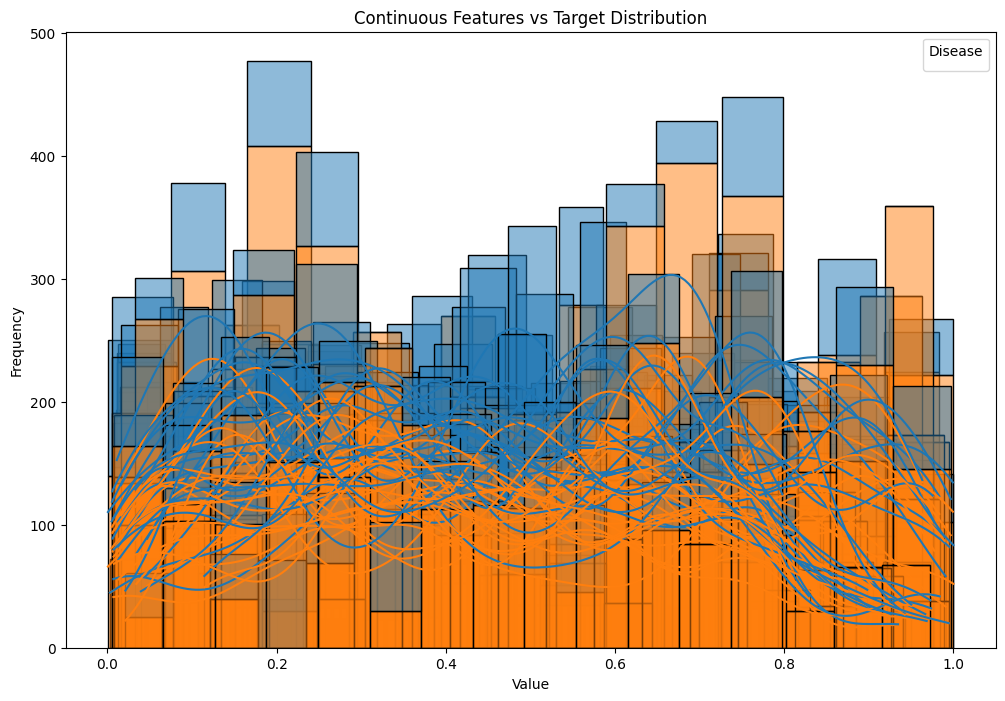

In [55]:
# Continuous Features vs Target Distribution
plt.figure(figsize=(12, 8))
for feature in numerical_features:
    sns.histplot(data=train_data, x=feature, hue='Disease', multiple='stack', kde=True)
plt.title('Continuous Features vs Target Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(title='Disease')
plt.show()